<a href="https://colab.research.google.com/github/MacasRenata/Tcc-2018/blob/master/aula_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 15]])

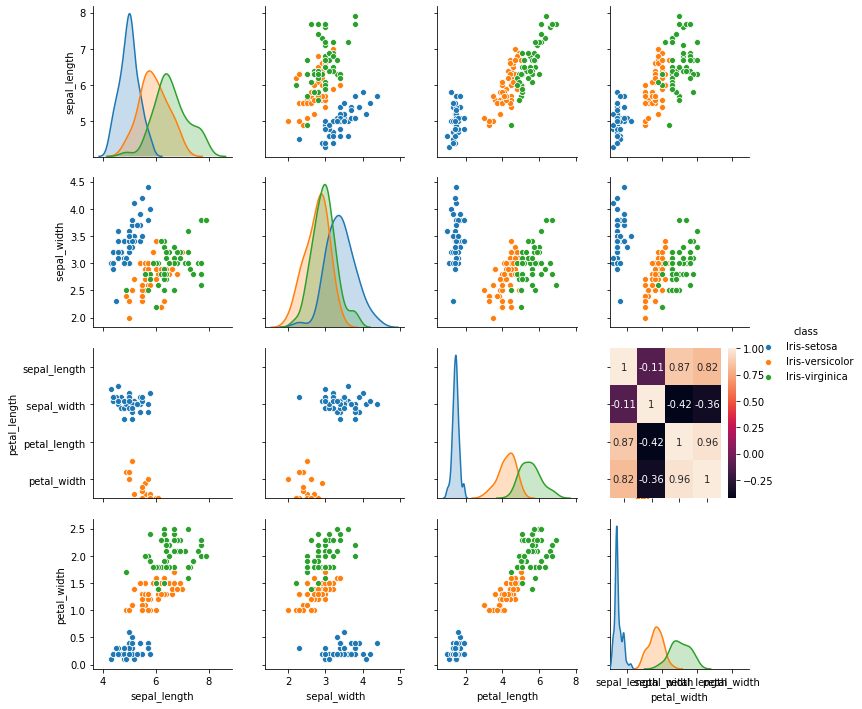

In [3]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from joblib import dump, load

cols = ['sepal_length', ' sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=cols)
df.head()

df.describe()

sns.pairplot(df, hue='class');

sns.heatmap(df.corr(), annot=True)

df['class_encod'] = df['class'].apply(lambda x: 0 if x == 'Iris-setosa' else 1 if x == 'Iris-versicolor' else 2)
df['class_encod'].unique()

y = df[['class_encod']] # target attributes 
X = df.iloc[:, 0:4] # input attributes
X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

np.shape(y_train)

m = KNeighborsClassifier()
m.fit(X_train, np.ravel(y_train))

m.predict(X_test.iloc[0:10])

m.score(X_test, y_test)
confusion_matrix(y_test, m.predict(X_test))

dump(m, 'iris-classifier.dmp')

ic = load('iris-classifier.dmp')
confusion_matrix(y_test, ic.predict(X_test))

